In [5]:
# Import Premium and Claim data and merge both data sets into one data.

Premium <- read.csv("/content/Premiums.csv")
Claim <- read.csv("/content/Claims.csv")

merged_data <- merge(Premium, Claim, by = "POLICY_NO", all = TRUE)


ZONE_NAME,Premium
<chr>,<dbl>
East,990.2035
North,1238.2067
South,1083.2030


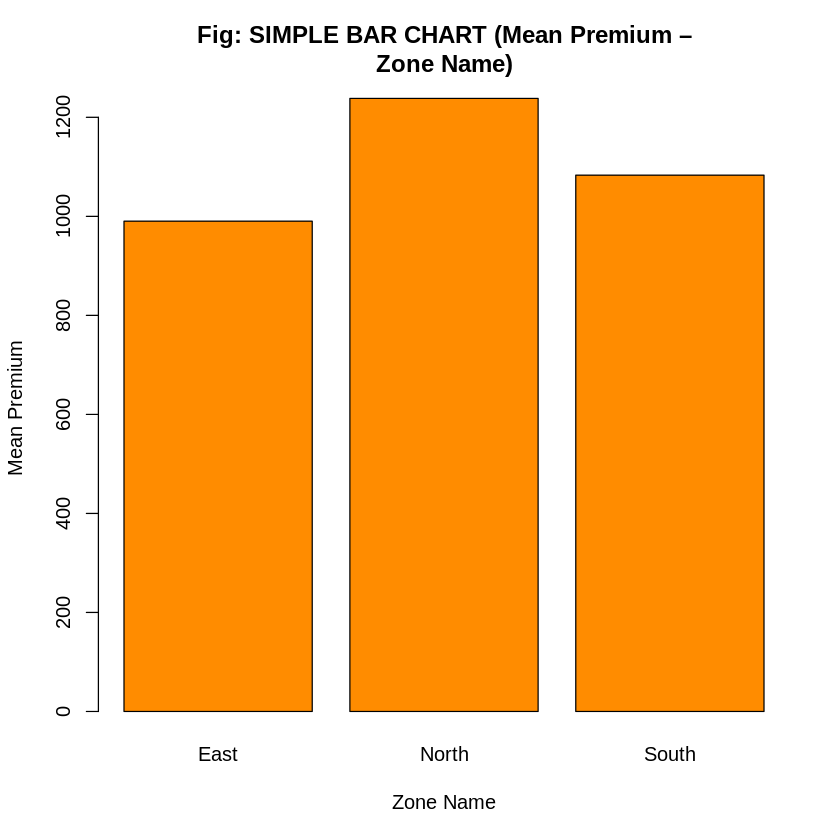

In [16]:
# For each zone, obtain the mean Premium and plot a bar chart showing the mean Premium over zone. (Use any color from a palette from R( Color Brewer)

mean_by_zone <-aggregate(Premium~ZONE_NAME,data = merged_data, FUN=mean)
mean_by_zone

barplot(mean_by_zone$Premium, main= "Fig: SIMPLE BAR CHART (Mean Premium –
Zone Name)", names.arg = mean_by_zone$ZONE_NAME, xlab = "Zone Name",
ylab="Mean Premium", col = "darkorange")



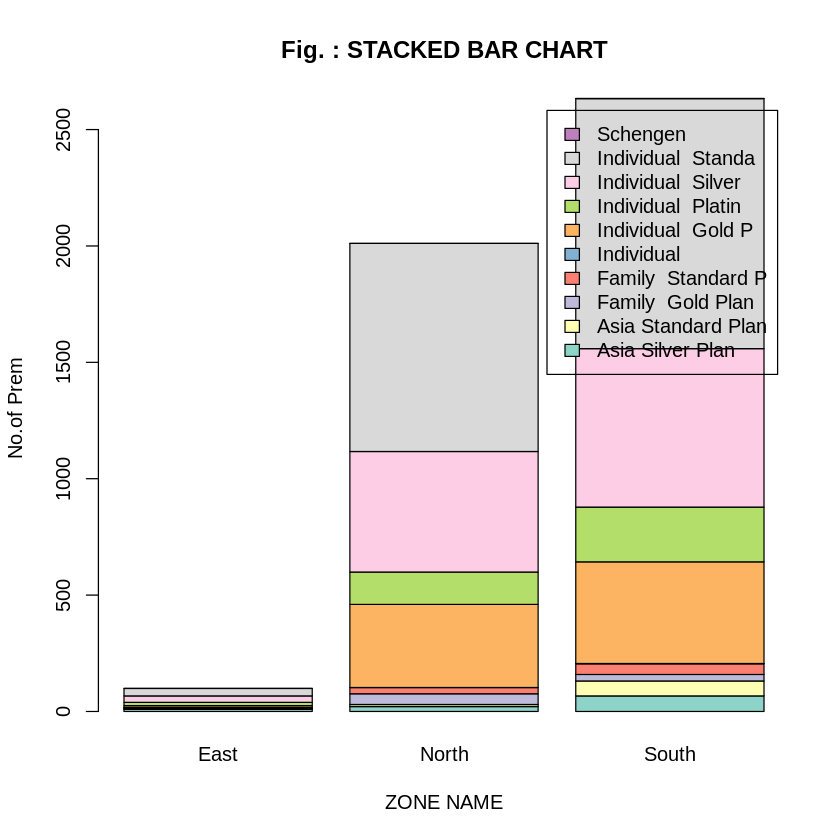

In [27]:
# Obtain a stacked bar chart for all the Zones over Sub plans by the Premium amount.

mat_count <-table(merged_data$Plan,merged_data$ZONE_NAME)


barplot(mat_count,main="Fig. : STACKED BAR CHART",
xlab ="ZONE NAME",ylab ="No.of Prem", col=brewer.pal(n = nrow(mat_count), "Set3"),
legend=rownames(mat_count))

In [40]:
#install.packages("plotly")
library(plotly)

# Obtain a heat map of Plan and Zone with respective average Premium.

avg_premium <- aggregate(Premium~ZONE_NAME+Plan,data = merged_data, FUN=mean)

plot_ly(avg_premium, x=avg_premium$Plan, y=avg_premium$ZONE_NAME,
z=avg_premium$premium,
type="heatmap",connectgaps=FALSE,showscale=T)



## WHY the heatmap is not shown?

Output hidden; open in https://colab.research.google.com to view.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


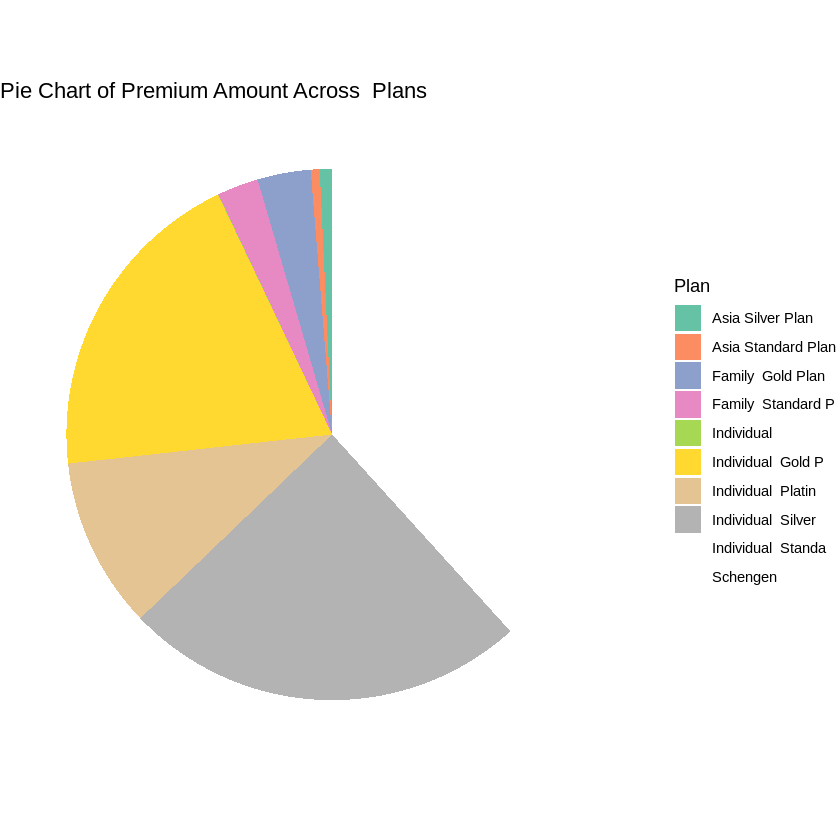

In [50]:
#Obtain a pie chart using ggplot2 for Premium amount across different sub plans. (Use any palette from R (Color Brewer)

total_premium_by_plan <- merged_data %>%
  group_by(Plan) %>%
  summarize(total_premium = sum(Premium, na.rm = TRUE))


ggplot(total_premium_by_plan, aes(x = "", y = total_premium, fill = Plan)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Pie Chart of Premium Amount Across  Plans", fill = "Plan") +
  theme_void()
